# 2.3. Experiments

Assuming one table schema, 100 attributes, and each attribute being 10 bytes each, we have met the criteria for a fixed length record data scheme. Based on this data we know each record will be 1000 bytes to serialize.

A record in our sense (defined with `std::vector<V> Record`) is an array of strings. In our experiment (which can be viewed in experiment_fixed_len_sizeof.cc) we initialize a Record of 100 strings:

```c
Record record = {
    "SQHVXJTXOK",
    "NABHDFBCWB",
    "XAWTEBKZWL",
    "OBPQAPWYKC",
    "RJESFTAEUK",
    "NSCLEQRJVJ",
    "RAYZKLAIEN",
    "SHVLBDTEHU",
    ...,
}
```

Once complete, we run `fixed_len_sizeof(&record)` which calculates the amount of bytes it takes to serialize this record.

```bash
bash-3.2$ ./experiment_fixed_len_sizeof
1000
```

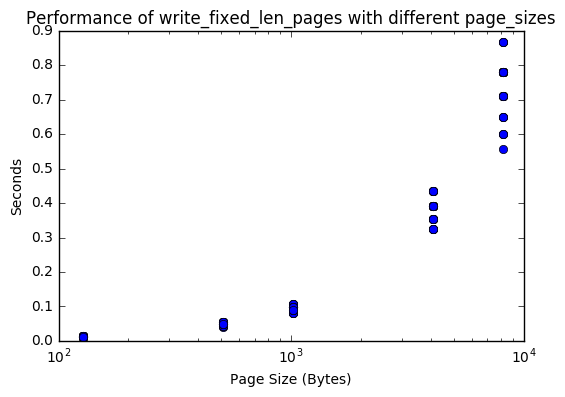

In [4]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

def get_data(csvfile):
    reader = csv.DictReader(csvfile)
    return zip(*[
        (
            row['page_size'], 
            row['milliseconds_elapsed'],
            # calculate data rate: mebibytes / second
            (
                # convert bytes -> mebibytes
                (int(row['page_size']) / 2 ** 20)
                /
                # convert milliseconds -> seconds
                (int(row['milliseconds_elapsed']) / 1000)
            )
        )
        for row in reader
    ])

with open('./results_write.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Performance of write_fixed_len_pages ' +
        'with different page_sizes'
    )
    plt.xlabel('Page Size (Bytes)')
    plt.ylabel('Seconds')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()